In [30]:
%load_ext tikzmagic
%matplotlib inline

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# 확률적 데이터

## 측정과 추론

데이터는 처음부터 그냥 존재하는 것이 아니라 사람의 행위에 의해 얻어지는 것이다. 우리가 데이터를 얻는 과정은 크게 두 가지로 나누어진다. 하나가 현실세계에서 데이터를 얻는 <b>측정(measure)</b>이고 또 하나는 이미 얻어진 데이터를 기반으로 다른 데이터를 도출하는 <b>추론(inference)</b>이다. 예를 들어 어떤 식당의 일일 매출액이라는 데이터를 얻어내는 과정은 측정이라고 할 수 있다. 대부분의 경우 반복하여 측정을 실시할 수 있기 때문에 데이터는 복수의 값을 가지게 된다. 다음은 열흘동안 어떤 식당의 일매출액을 측정한 값이다. 이 데이터는 10개의 값을 가진다. (여기에서 매출액의 단위는 만원이고 매출액이 10만원 단위의 값만 가진다고 가정한다.)

In [20]:
import pandas as pd

df = pd.DataFrame({
    "날짜": ["2022.1.1", "2022.1.2", "2022.1.3", "2022.1.4", "2022.1.5", "2022.1.6", "2022.1.7", "2022.1.8", "2022.1.9", "2022.1.10"],
    "일매출액": [30, 10, 30, 20, 40, 30, 20, 50, 30, 40]
})
df

,날짜,일매출액
0,2022.1.1,30
1,2022.1.2,10
2,2022.1.3,30
3,2022.1.4,20
4,2022.1.5,40
5,2022.1.6,30
6,2022.1.7,20
7,2022.1.8,50
8,2022.1.9,30
9,2022.1.10,40



## 변수와 값 

측정을 통해 데이터를 얻어내는 과정은 자판기에서 물건이 나오는 것에 비유할 수 있다. 자판기의 버튼을 누를 때마다 상품이 하나씩 나오는 것처럼 우리가 측정행위를 하면 <b>값(value)</b>이 하나씩 나오게 된다. 이 때 우리가 관심을 가져야 할 것은 자판기로부터 나오는 상품 즉, 데이터의 값 뿐아니라 그 값을 만들어내는 자판기다. 자판기는 일종의 데이터 값 생성기(value-generator)라고 부를 수 있다. 데이터 과학에서는 이러한 데이터 생성기를 <b>변수(variable)</b>라고 부른다. 다른 수학 분야나 프로그래밍 등에서는 변수가 특정한 하나의 값을 대표하는 것이지만 데이터 과학에서는 변수를 여러가지 값을 만들어내는 생성기로 취급한다. 측정행위로 얻어진 값은 해당 변수가 만들어낸 값이라고 볼 수 있다. 데이터를 다룰 때는 변수와 그 변수가 만들어낼 수 있는 값을 구분하여 생각해야 한다. 위의 예에서 "일매출액"은 변수이고 10, 20 등의 숫자는 그 변수가 생성한 값이다. 

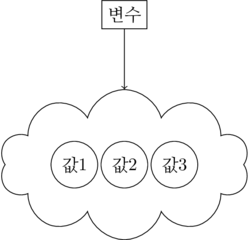

In [17]:
%%tikz -l shapes.symbols -p kotex -e utf-8

\node[draw] (v) at (0,3) {변수};
\node[draw, cloud, minimum height=3cm, minimum width=5cm] (d) at (0,0) {};
\node[draw, circle] (d1) at (-1,0) {값1};
\node[draw, circle] (d2) at (0,0) {값2};
\node[draw, circle] (d3) at (1,0) {값3};
\draw[->] (v) -- (d);

## 확률적 데이터

 

측정에 의해 얻어지는 데이터의 대부분은 다음과 같은 특징을 가진다. (사실 다음 특성은 측정에 의해 얻지는 데이터 뿐 아니라 추론에 의해 도출되는 데이터도 마찬가지이다. 그러나 이 절에서는 우선 설명을 단순화화기 위해 측정에 의해 얻어지는 데이터로 국한하여 생각하자.)

* 반복적으로 얻을 수 있다. 
* 측정할 때마다 얻어지는 값이 바뀌는 경우가 대부분이다.
* 다음번에 다시 측정할 때 어떤 값이 나올지 정확히는 알 수 없다. 

위에서 예로 든 식당의 일매출액도 같은 특징을 가진다. 매일 매일 반복적으로 값이 나오며 이 값은 어제와 오늘이 다른 경우가 대부분이다. 또한 내일의 일매출액에 대해서도 정확한 값을 예측할 수 없다. 이러한 특징을 가지는 데이터를 <b>확률적 데이터(probabilistic data, random data)</b>라고 한다. 사실 데이터 분석의 대상이 되는 모든 데이터가 확률적 데이터라고 해도 무방할 것이다. 데이터가 확률적 데이터이면 그 데이터의 변수는 <b>확률변수(random variable)</b>라고 부른다. 


## 확률분포

그러면 이러한 확률적 데이터의 값은 어떻게 표시하고 다른 사람에게 전달할 수 있을까? 가장 단순한 방법은 측정에 의해 얻어진 모든 값 전체를 표시하고 전달하는 것이다. 이 방법을 쓰면 아무런 정보의 손실이 발생하지 않는다는 장점이 있다. 그러나 전달할 정보량이 많아지고 아무런 추가적 정보를 줄 수 없다는 단점이 있다. 다음으로 생각할 수 있는 방법은 어떤 하나의 대표값만을 선택하여 전달하는 것이다. 대표값으로는 평균값을 선택할 수도 있고 최빈값, 최대값, 최소값 등 다른 방법을 선택할 수도 있다. 대표값을 사용하면 단 하나의 값만 전달하므로 전달할 정보량이 적어진다는 장점이 있다. 그러나 그 값에 대한 신뢰도를 알 수 없다는 단점을 가진다. 

이 때 쓸 수 있는 방법이 확률분포를 사용하는 것이다. <b>확률분포(probability distribution)</b>는 데이터가 가질 수 있는 모든 값과 각각의 값에 대한 확률을 나타낸 것이다. 이때 확률은 특정한 값이 나올 수 있는 가능성, 혹은 그 값이 가지는 신뢰도를 뜻한다. 

### 확률질량함수

확률분포는 여러가지 방법으로 표시할 수 있다. 데이터의 값이 범주형일 경우에는 표를 이용할 수 있다. 우선 데이터가 가질 수 있는 값을 모두 표시한 후에 그 값의 확률을 해당 값 옆에 표시한다. 예를 들어 위에서 말한 식당의 일매출액이 10, 20, 30, 40, 50의 다섯가지 경우만 가능하고 다른 값은 나올 수 없다고 가정하자. 그러면 일매출액의 값은 다섯 종류의 값만 가질수 있는 범주형 데이터라고 할 수 있다. 
따라서 다음과 같은 표의 형태로 확률분포 표를 만들 수 있다. 

In [27]:
df_pmf = df["일매출액"].value_counts().sort_index()
df_pmf = df_pmf / df_pmf.sum()
df_pmf

10    0.1
20    0.2
30    0.4
40    0.2
50    0.1
Name: 일매출액, dtype: float64

이 표는 일매출액의 값을 입력으로 가지고 확률을 출력으로 가지는 함수라고 할 수 있다. 이러한 함수를 <b>확률질량함수(probability mass function)</b>라고 한다. 

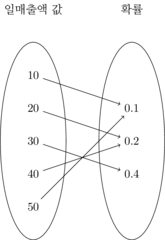

In [54]:
%%tikz -l shapes.geometric -p kotex -e utf-8

\node (domain-title) at (0, 7) {일매출액 값};
\node[draw, ellipse, minimum height=6cm, minimum width=2cm] (domain) at (0,3) {};
\node (d1) at (0, 5) {10};
\node (d2) at (0, 4) {20};
\node (d3) at (0, 3) {30};
\node (d4) at (0, 2) {40};
\node (d5) at (0, 1) {50};
\node (range-title) at (3, 7) {확률};
\node[draw, ellipse, minimum height=6cm, minimum width=2cm] (range) at (3,3) {};
\node (p1) at (3, 4) {0.1};
\node (p2) at (3, 3) {0.2};
\node (p3) at (3, 2) {0.4};
\draw[->] (d1) -- (p1);
\draw[->] (d2) -- (p2);
\draw[->] (d3) -- (p3);
\draw[->] (d4) -- (p2);
\draw[->] (d5) -- (p1);

이 함수를 그래프로 표시하면 다음과 같다.

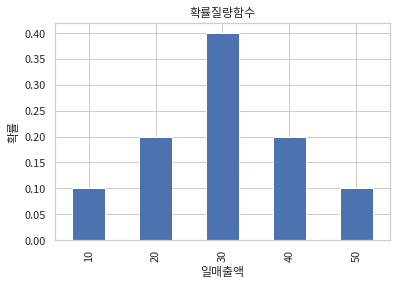

In [33]:
df_pmf.plot(kind="bar")
plt.title("확률질량함수")
plt.xlabel("일매출액")
plt.ylabel("확률")
plt.show()

### 확률밀도함수

데이터가 수치형인 경우에는 나올 수 있는 값의 종류가 무한하게 많으므로 위와 같이 표로 표시할 수 없다. 이 경우에는 확률밀도함수(probability density function)라는 것을 사용한다. 확률밀도함수는 데이터가 가질 수 있는 값을 입력으로 받아 그 값에 해당하는 신뢰도 수치인 확률밀도를 출력하는 함수다. 